# Mouse gastrulation (erythroid)

In [1]:
import shutup
shutup.please()
import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-17 13:52:12


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "erythroid"
data_path = "D:/cuhk/project/velocity/dataset/scRNA-seq/Gastrulation/erythroid_lineage_processed.h5ad"
adata = sc.read(data_path)

group_key = "celltype"
emb_key = "X_umap"
cluster_edges = [('Blood progenitors 1', 'Blood progenitors 2'), ('Blood progenitors 2', 'Erythroid1'),
                 ('Erythroid1', 'Erythroid2'), ('Erythroid2', 'Erythroid3')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


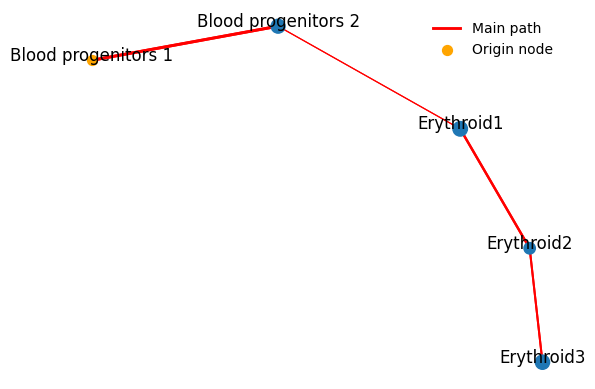


main path: ['Blood progenitors 1', 'Blood progenitors 2', 'Erythroid1', 'Erythroid2', 'Erythroid3']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 4.742 
median: 0.470 
lower quantile: -10.961 
upper quantile: 15.956 
minimum: -167.996 
maximum: 205.821 
No. of positive scores: 255

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [01:38<00:00,  1.02it/s, cos_s=0.623, cos_u=0.905, mse_s=0.011, mse_u=0.007]


computing velocity graph (using 20/20 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


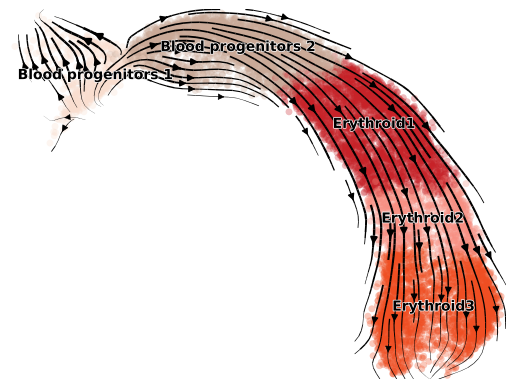

TIVelo:
 CBDir: 0.7198 ICVCoh: 0.6236 
 CBDir2: 0.6164 ICVCoh2: 0.9128 
 TransProbs: 0.4436 VeloCoh: 0.2504


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


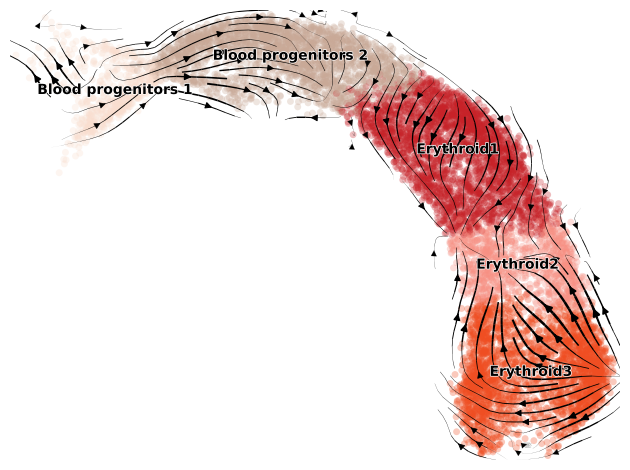

scvelo:
 CBDir: 0.1166 ICVCoh: 0.7623 
 CBDir2: 0.0016 ICVCoh2: 0.5609 
 TransProbs: 0.1393 VeloCoh: 0.0419


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

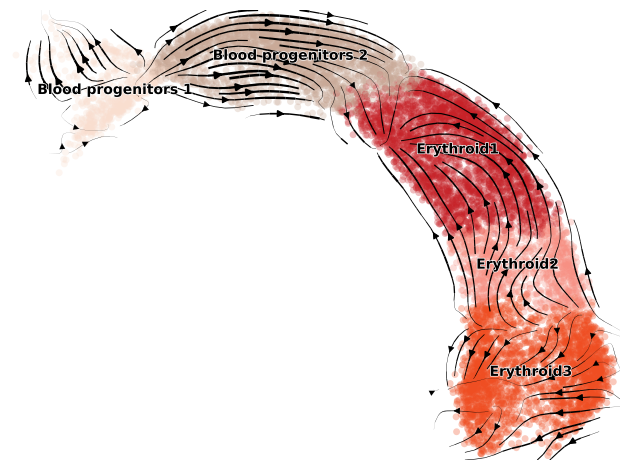

scvelo2:
 CBDir: -0.2989 ICVCoh: 0.8604 
 CBDir2: -0.0032 ICVCoh2: 0.6509 
 TransProbs: 0.0385 VeloCoh: 0.0688


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

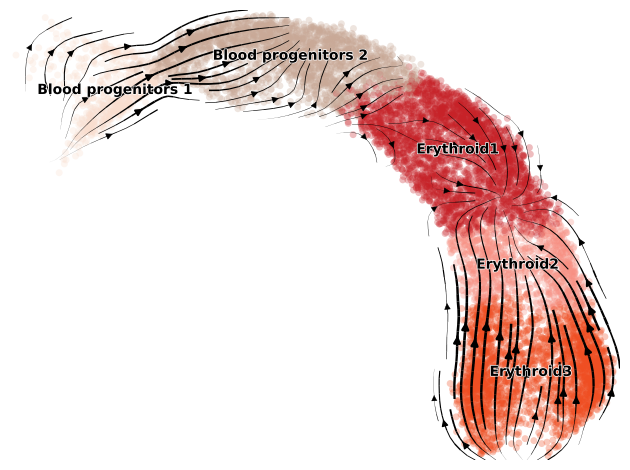

velovi:
 CBDir: -0.0034 ICVCoh: 0.8947 
 CBDir2: 0.0170 ICVCoh2: 0.7806 
 TransProbs: 0.0544 VeloCoh: 0.2695


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

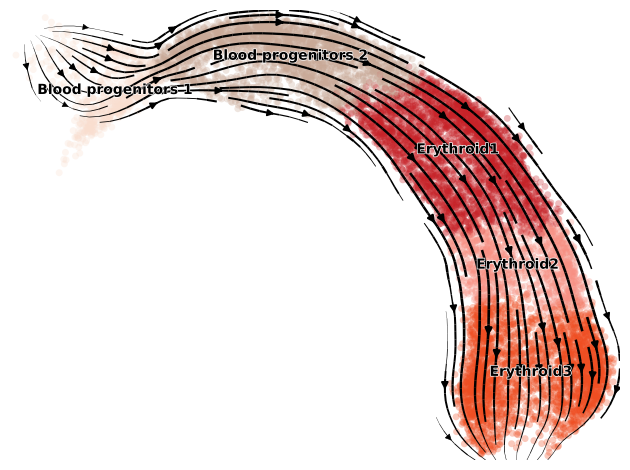

unitvelo:
 CBDir: 0.8357 ICVCoh: 0.9906 
 CBDir2: 0.3262 ICVCoh2: 0.9690 
 TransProbs: 0.2593 VeloCoh: -0.1514


In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

computing velocity graph (using 20/20 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


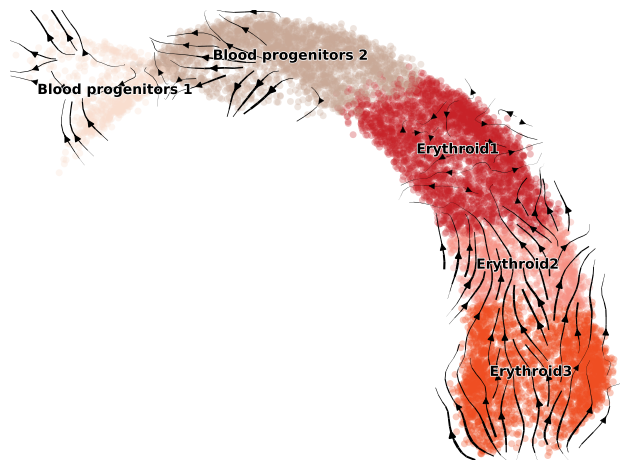

celldancer:
 CBDir: -0.3196 ICVCoh: 0.9235 
 CBDir2: -0.2989 ICVCoh2: 0.4269 
 TransProbs: 0.0001 VeloCoh: -0.1609


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)